In [71]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import matplotlib.dates as mdates
import numpy as np

from sklearn import model_selection
from sklearn.dummy import DummyClassifier, DummyRegressor
from sklearn.linear_model import (LogisticRegression, LinearRegression)
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.neighbors import (KNeighborsClassifier, KNeighborsRegressor)
# https://stackoverflow.com/questions/25336176/does-scikit-learn-include-a-naive-bayes-classifier-with-continuous-inputs
from sklearn.naive_bayes import GaussianNB
# https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.BayesianRidge.html#sklearn.linear_model.BayesianRidge
from sklearn.linear_model import BayesianRidge
from sklearn.svm import SVC, SVR
from sklearn.ensemble import (RandomForestClassifier, RandomForestRegressor)
import xgboost
from sklearn.dummy import DummyClassifier
from sklearn import metrics
from sklearn.metrics import accuracy_score, make_scorer
from sklearn.model_selection import cross_validate
from tabulate import tabulate
from operator import itemgetter

# https://www.educative.io/blog/scikit-learn-cheat-sheet-classification-regression-methods
from lightgbm import LGBMRegressor
from catboost import CatBoostRegressor
from sklearn.linear_model import SGDRegressor
from sklearn.kernel_ridge import KernelRidge
from sklearn.linear_model import ElasticNet
from sklearn.ensemble import GradientBoostingRegressor

# Irish Data and models

In [18]:
df_ireland = pd.read_csv("data/final/df_final_irish_beef_feat_cols_and_target_values_1999-2022.csv")

In [19]:
df_ireland

,Unnamed: 0,bullocks_200-249kg,bullocks_250-299kg,bullocks_300-349kg,bullocks_350-399kg,bullocks_400-449kg,bullocks_450-499kg,bullocks_500-549kg,bullocks_550kg+,heifers_200-249kg,...,pork_loin_chops_per_kg,pork_sausages_per_kg,pork_steak_per_kg,potatoes_10_kg,sherry_take_home_75cl_bottle,sirloin_steak_per_kg,stout_draught_bar_1_pint,tomatoes_per_kg,vodka_take_home_70cl_bottle,whiskey_take_home_70cl_bottle
0,1999-01-31,136.83,139.73,133.33,131.07,127.16,120.83,121.28,119.78,83.25,...,6.83387,3.92049,10.11682,6.99516,10.01776,10.42162,2.66192,2.36474,15.45209,17.31772
1,1999-02-28,143.80,140.10,130.93,126.85,122.36,121.99,118.89,122.60,72.94,...,6.92023,3.88620,10.05459,7.10311,10.18159,10.53465,2.66192,2.29743,15.46860,17.31645
2,1999-03-31,146.38,133.37,126.74,121.88,121.34,120.37,123.38,120.78,88.66,...,7.21741,3.89382,9.99236,7.06755,10.20953,10.41908,2.66192,2.10820,15.46098,17.31645
3,1999-04-30,141.20,131.58,121.23,119.14,120.69,124.75,122.41,122.15,76.94,...,7.18693,3.90017,9.81202,6.92150,10.24001,10.65911,2.69240,2.35077,15.42796,17.32788
4,1999-05-31,136.09,122.94,116.59,121.77,123.92,122.61,124.88,121.30,114.15,...,7.30631,3.92303,10.02411,6.83387,10.21715,10.78738,2.73558,2.13360,15.54480,17.63776
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
273,2021-10-31,172.03,196.88,185.30,198.15,203.87,201.15,203.94,199.58,222.61,...,7.54300,6.22100,7.84500,7.63800,14.04300,14.20900,4.95000,3.36400,20.49700,25.05500
274,2021-11-30,169.93,174.18,196.74,203.66,199.36,197.53,205.40,204.63,194.16,...,7.39400,6.18800,8.72500,7.63800,14.04300,14.20900,4.94800,3.36800,19.40400,22.93100
275,2021-12-31,210.53,200.10,191.37,208.82,204.46,203.70,201.86,207.42,211.98,...,7.56400,6.22100,7.40200,7.63800,14.04300,14.25800,4.94300,3.37600,18.68800,22.37900
276,2022-01-31,204.89,215.17,221.32,225.42,212.41,223.02,224.50,214.11,245.92,...,7.46200,6.20800,8.37200,7.63800,14.04300,14.25800,4.94600,3.22800,24.54400,27.65700


In [20]:
df_ireland = df_ireland.rename(columns={'Unnamed: 0':"date"})

In [21]:
df_ireland = df_ireland.set_index("date")

In [22]:
df_ireland.columns.sort_values()

Index(['ale_draught_bar_1_pint', 'all_items', 'best_back_rashers_per_kg',
       'brandy_take_home_70cl_bottle', 'brent_price', 'broccoli_per_kg',
       'bullocks_200-249kg', 'bullocks_250-299kg', 'bullocks_300-349kg',
       'bullocks_350-399kg', 'bullocks_400-449kg', 'bullocks_450-499kg',
       'bullocks_500-549kg', 'bullocks_550kg+', 'butter_per_lb',
       'carrots_per_kg', 'cattle', 'cents_per_kg', 'cereals',
       'compound_feeding_stuffs_for_cattle_excluding_calves',
       'compound_feeding_stuffs_for_pigs',
       'compound_feeding_stuffs_for_poultry', 'cooked_ham_per_kg',
       'crop_output', 'crude_price', 'diesel', 'diesel_per_ltr', 'electricity',
       'eurgbp', 'eurusd', 'feeding_stuffs', 'fertilisers',
       'food_and_non-alcoholic_beverages', 'ham_fillet_per_kg',
       'heifers_200-249kg', 'heifers_250-299kg', 'heifers_300-349kg',
       'heifers_350-399kg', 'heifers_400-449kg', 'irish_cheddar_per_kg',
       'jam_per_lb', 'lamb_gigot_chops_per_kg', 'lamb_loin_ch

In [23]:
# these features combind make up the target_cattle target value so they are leaky features
# this basically means including them in the model training would be giving the model future information
# which we couldn't expect to have at the testing phase or whenver we try to do a prediction on new data
leakey_features=[
    'bullocks_200-249kg', 'bullocks_250-299kg', 'bullocks_300-349kg',
    'bullocks_350-399kg', 'bullocks_400-449kg', 'bullocks_450-499kg',
    'bullocks_500-549kg', 'bullocks_550kg+',
    'heifers_200-249kg', 'heifers_250-299kg', 'heifers_300-349kg',
    'heifers_350-399kg', 'heifers_400-449kg']

In [24]:
y_col="target_cattle"

In [25]:
feature_cols = []
for col in df_ireland.columns:
    if col not in leakey_features:
        feature_cols.append(col)
feature_cols = sorted(feature_cols)
print(feature_cols)

['ale_draught_bar_1_pint', 'all_items', 'best_back_rashers_per_kg', 'brandy_take_home_70cl_bottle', 'brent_price', 'broccoli_per_kg', 'butter_per_lb', 'carrots_per_kg', 'cattle', 'cents_per_kg', 'cereals', 'compound_feeding_stuffs_for_cattle_excluding_calves', 'compound_feeding_stuffs_for_pigs', 'compound_feeding_stuffs_for_poultry', 'cooked_ham_per_kg', 'crop_output', 'crude_price', 'diesel', 'diesel_per_ltr', 'electricity', 'eurgbp', 'eurusd', 'feeding_stuffs', 'fertilisers', 'food_and_non-alcoholic_beverages', 'ham_fillet_per_kg', 'irish_cheddar_per_kg', 'jam_per_lb', 'lamb_gigot_chops_per_kg', 'lamb_loin_chops_per_kg', 'lambs_liver_per_kg', 'marmalade_per_lb', 'milk', 'motor_fuel', 'mushrooms_per_kg', 'npk_fertilisers', 'onions_per_kg', 'other_goods_and_services', 'pbeefusdm', 'petrol', 'petrol_unleaded_per_ltr', 'pigs', 'pk_fertilisers', 'plant_protection_products', 'pork_loin_chops_per_kg', 'pork_sausages_per_kg', 'pork_steak_per_kg', 'potatoes', 'potatoes_10_kg', 'poultry', 'rai

In [26]:
feature_cols.remove(y_col)

In [27]:
X_train, X_test, y_train, y_test = model_selection.train_test_split(df_ireland[feature_cols], df_ireland[y_col], test_size=0.3, random_state=42)

In [28]:
bm = DummyRegressor()
bm.fit(X_train, y_train)
bm.score(X_test, y_test) # accuracy

-5.606177198025364e-05

In [29]:
X = pd.concat([X_train, X_test])
y = pd.concat([y_train, y_test])

In [77]:
X = df_ireland[feature_cols]
y = df_ireland[y_col]

https://scikit-learn.org/stable/modules/model_evaluation.html
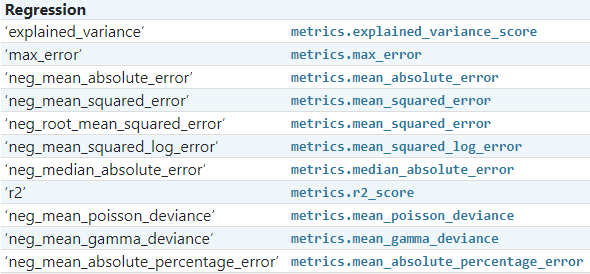

## Model training

In [30]:
for model in [
    DummyRegressor,
    LinearRegression,
    DecisionTreeRegressor,
    KNeighborsRegressor,
    BayesianRidge,
    SVR,
    RandomForestRegressor,
    xgboost.XGBRegressor,
    ]:
    
    cls = model()
    kfold = model_selection.KFold(n_splits=10)
    s = model_selection.cross_val_score(cls, X, y, scoring="r2", cv=kfold)
    
    print(
    f"{model.__name__:22} r2: "
    f"{s.mean():.3f} STD: {s.std():.2f}"
    )

DummyRegressor         r2: -0.035 STD: 0.06
LinearRegression       r2: 0.946 STD: 0.02
DecisionTreeRegressor  r2: 0.866 STD: 0.09
KNeighborsRegressor    r2: 0.872 STD: 0.05
BayesianRidge          r2: 0.940 STD: 0.01
SVR                    r2: 0.529 STD: 0.08
RandomForestRegressor  r2: 0.945 STD: 0.03
XGBRegressor           r2: 0.949 STD: 0.02


In [41]:
# https://scikit-learn.org/stable/auto_examples/decomposition/plot_pca_vs_fa_model_selection.html#sphx-glr-auto-examples-decomposition-plot-pca-vs-fa-model-selection-py

In [78]:
results = []
for model in [
    DummyRegressor,
    LinearRegression,
    DecisionTreeRegressor,
    KNeighborsRegressor,
    BayesianRidge,
    SVR,
    RandomForestRegressor,
    xgboost.XGBRegressor,
    LGBMRegressor,
    CatBoostRegressor,
    SGDRegressor,
    KernelRidge,
    ElasticNet,
    GradientBoostingRegressor
    ]:
    
    cls = model()
    
    kfold = model_selection.KFold(n_splits=10)
    
    scoring = ( 'r2', 'neg_mean_absolute_error', 'neg_mean_squared_error')
    print("Train model:", model.__name__)
    scores = cross_validate(cls, X, y, cv=kfold, scoring=scoring, return_train_score=True)
    
    results.append([
        model.__name__,
        f"{scores['train_r2'].mean():.3f}",
        f"{scores['test_r2'].mean():.3f}",
        f"{scores['train_neg_mean_absolute_error'].mean():.3f}",
        f"{scores['test_neg_mean_absolute_error'].mean():.3f}",
        f"{scores['train_neg_mean_squared_error'].mean():.3f}",
        f"{scores['test_neg_mean_squared_error'].mean():.3f}",

    ])

Train model: DummyRegressor
Train model: LinearRegression
Train model: DecisionTreeRegressor
Train model: KNeighborsRegressor
Train model: BayesianRidge
Train model: SVR
Train model: RandomForestRegressor
Train model: XGBRegressor
Train model: LGBMRegressor
Train model: CatBoostRegressor
Learning rate set to 0.032889
0:	learn: 26.6142680	total: 7.6ms	remaining: 7.59s
1:	learn: 26.0010847	total: 14.3ms	remaining: 7.12s
2:	learn: 25.4037354	total: 22.7ms	remaining: 7.55s
3:	learn: 24.8217943	total: 32.8ms	remaining: 8.15s
4:	learn: 24.2714175	total: 40.5ms	remaining: 8.07s
5:	learn: 23.6964678	total: 47.8ms	remaining: 7.92s
6:	learn: 23.1823160	total: 54.5ms	remaining: 7.74s
7:	learn: 22.6448241	total: 61.3ms	remaining: 7.61s
8:	learn: 22.1878008	total: 68.4ms	remaining: 7.53s
9:	learn: 21.7331304	total: 76.3ms	remaining: 7.56s
10:	learn: 21.3060705	total: 83.9ms	remaining: 7.54s
11:	learn: 20.8384010	total: 90.9ms	remaining: 7.49s
12:	learn: 20.4166019	total: 97.7ms	remaining: 7.42s
13:

160:	learn: 4.2449851	total: 1.05s	remaining: 5.47s
161:	learn: 4.2170785	total: 1.05s	remaining: 5.46s
162:	learn: 4.1922219	total: 1.06s	remaining: 5.46s
163:	learn: 4.1654514	total: 1.07s	remaining: 5.45s
164:	learn: 4.1430280	total: 1.07s	remaining: 5.44s
165:	learn: 4.1165376	total: 1.08s	remaining: 5.43s
166:	learn: 4.0902141	total: 1.09s	remaining: 5.43s
167:	learn: 4.0654010	total: 1.09s	remaining: 5.42s
168:	learn: 4.0628989	total: 1.09s	remaining: 5.39s
169:	learn: 4.0515487	total: 1.1s	remaining: 5.38s
170:	learn: 4.0320225	total: 1.11s	remaining: 5.37s
171:	learn: 4.0203641	total: 1.11s	remaining: 5.36s
172:	learn: 4.0035268	total: 1.12s	remaining: 5.35s
173:	learn: 3.9904896	total: 1.13s	remaining: 5.34s
174:	learn: 3.9712297	total: 1.13s	remaining: 5.34s
175:	learn: 3.9539473	total: 1.14s	remaining: 5.33s
176:	learn: 3.9299482	total: 1.14s	remaining: 5.32s
177:	learn: 3.9054521	total: 1.15s	remaining: 5.31s
178:	learn: 3.8887031	total: 1.16s	remaining: 5.3s
179:	learn: 3.

336:	learn: 1.8513913	total: 2.15s	remaining: 4.23s
337:	learn: 1.8440369	total: 2.16s	remaining: 4.23s
338:	learn: 1.8318046	total: 2.16s	remaining: 4.22s
339:	learn: 1.8264448	total: 2.17s	remaining: 4.21s
340:	learn: 1.8213136	total: 2.19s	remaining: 4.23s
341:	learn: 1.8159040	total: 2.19s	remaining: 4.22s
342:	learn: 1.8058849	total: 2.2s	remaining: 4.21s
343:	learn: 1.8028855	total: 2.21s	remaining: 4.21s
344:	learn: 1.7942373	total: 2.21s	remaining: 4.2s
345:	learn: 1.7863521	total: 2.22s	remaining: 4.19s
346:	learn: 1.7748346	total: 2.22s	remaining: 4.18s
347:	learn: 1.7707832	total: 2.23s	remaining: 4.18s
348:	learn: 1.7630056	total: 2.23s	remaining: 4.17s
349:	learn: 1.7520654	total: 2.24s	remaining: 4.16s
350:	learn: 1.7446666	total: 2.25s	remaining: 4.15s
351:	learn: 1.7381295	total: 2.25s	remaining: 4.15s
352:	learn: 1.7339769	total: 2.26s	remaining: 4.14s
353:	learn: 1.7262062	total: 2.26s	remaining: 4.13s
354:	learn: 1.7151272	total: 2.27s	remaining: 4.13s
355:	learn: 1.

514:	learn: 0.9821040	total: 3.27s	remaining: 3.08s
515:	learn: 0.9803706	total: 3.28s	remaining: 3.08s
516:	learn: 0.9753268	total: 3.29s	remaining: 3.07s
517:	learn: 0.9725401	total: 3.29s	remaining: 3.07s
518:	learn: 0.9715173	total: 3.3s	remaining: 3.06s
519:	learn: 0.9699927	total: 3.31s	remaining: 3.05s
520:	learn: 0.9685957	total: 3.31s	remaining: 3.05s
521:	learn: 0.9654521	total: 3.32s	remaining: 3.04s
522:	learn: 0.9619940	total: 3.33s	remaining: 3.03s
523:	learn: 0.9605348	total: 3.33s	remaining: 3.03s
524:	learn: 0.9562386	total: 3.34s	remaining: 3.02s
525:	learn: 0.9513902	total: 3.34s	remaining: 3.01s
526:	learn: 0.9466252	total: 3.35s	remaining: 3.01s
527:	learn: 0.9455368	total: 3.35s	remaining: 3s
528:	learn: 0.9428029	total: 3.36s	remaining: 2.99s
529:	learn: 0.9400082	total: 3.37s	remaining: 2.99s
530:	learn: 0.9355478	total: 3.38s	remaining: 2.98s
531:	learn: 0.9345180	total: 3.38s	remaining: 2.98s
532:	learn: 0.9338266	total: 3.39s	remaining: 2.97s
533:	learn: 0.93

696:	learn: 0.5783054	total: 4.42s	remaining: 1.92s
697:	learn: 0.5760018	total: 4.43s	remaining: 1.92s
698:	learn: 0.5732293	total: 4.45s	remaining: 1.91s
699:	learn: 0.5727419	total: 4.46s	remaining: 1.91s
700:	learn: 0.5711803	total: 4.48s	remaining: 1.91s
701:	learn: 0.5705895	total: 4.49s	remaining: 1.91s
702:	learn: 0.5702509	total: 4.5s	remaining: 1.9s
703:	learn: 0.5682779	total: 4.51s	remaining: 1.9s
704:	learn: 0.5680474	total: 4.52s	remaining: 1.89s
705:	learn: 0.5661916	total: 4.53s	remaining: 1.88s
706:	learn: 0.5638217	total: 4.53s	remaining: 1.88s
707:	learn: 0.5612226	total: 4.54s	remaining: 1.87s
708:	learn: 0.5607818	total: 4.55s	remaining: 1.87s
709:	learn: 0.5595888	total: 4.55s	remaining: 1.86s
710:	learn: 0.5591837	total: 4.56s	remaining: 1.85s
711:	learn: 0.5562217	total: 4.57s	remaining: 1.85s
712:	learn: 0.5550037	total: 4.58s	remaining: 1.84s
713:	learn: 0.5541101	total: 4.59s	remaining: 1.84s
714:	learn: 0.5531300	total: 4.61s	remaining: 1.84s
715:	learn: 0.5

875:	learn: 0.3583757	total: 5.73s	remaining: 811ms
876:	learn: 0.3567154	total: 5.73s	remaining: 804ms
877:	learn: 0.3557488	total: 5.74s	remaining: 798ms
878:	learn: 0.3553934	total: 5.75s	remaining: 791ms
879:	learn: 0.3548607	total: 5.75s	remaining: 784ms
880:	learn: 0.3543715	total: 5.76s	remaining: 778ms
881:	learn: 0.3528722	total: 5.76s	remaining: 771ms
882:	learn: 0.3512734	total: 5.77s	remaining: 764ms
883:	learn: 0.3500179	total: 5.78s	remaining: 758ms
884:	learn: 0.3496358	total: 5.78s	remaining: 751ms
885:	learn: 0.3482450	total: 5.79s	remaining: 745ms
886:	learn: 0.3480289	total: 5.79s	remaining: 738ms
887:	learn: 0.3473665	total: 5.8s	remaining: 731ms
888:	learn: 0.3460619	total: 5.8s	remaining: 725ms
889:	learn: 0.3450890	total: 5.81s	remaining: 718ms
890:	learn: 0.3440793	total: 5.82s	remaining: 712ms
891:	learn: 0.3431298	total: 5.82s	remaining: 705ms
892:	learn: 0.3423552	total: 5.83s	remaining: 698ms
893:	learn: 0.3411930	total: 5.83s	remaining: 692ms
894:	learn: 0.

53:	learn: 10.9017021	total: 454ms	remaining: 7.96s
54:	learn: 10.7601569	total: 464ms	remaining: 7.97s
55:	learn: 10.6271237	total: 473ms	remaining: 7.96s
56:	learn: 10.4803948	total: 482ms	remaining: 7.98s
57:	learn: 10.3485870	total: 492ms	remaining: 7.99s
58:	learn: 10.2052031	total: 503ms	remaining: 8.02s
59:	learn: 10.0945449	total: 512ms	remaining: 8.02s
60:	learn: 9.9553118	total: 521ms	remaining: 8.02s
61:	learn: 9.8120632	total: 532ms	remaining: 8.05s
62:	learn: 9.6931009	total: 539ms	remaining: 8.01s
63:	learn: 9.5932233	total: 547ms	remaining: 8s
64:	learn: 9.4891623	total: 555ms	remaining: 7.98s
65:	learn: 9.3628859	total: 564ms	remaining: 7.98s
66:	learn: 9.2408281	total: 573ms	remaining: 7.97s
67:	learn: 9.1381219	total: 582ms	remaining: 7.97s
68:	learn: 9.0419933	total: 591ms	remaining: 7.98s
69:	learn: 8.9237258	total: 601ms	remaining: 7.98s
70:	learn: 8.8147377	total: 610ms	remaining: 7.98s
71:	learn: 8.7101124	total: 620ms	remaining: 7.99s
72:	learn: 8.6152297	total:

222:	learn: 3.2104293	total: 1.75s	remaining: 6.09s
223:	learn: 3.1962210	total: 1.75s	remaining: 6.08s
224:	learn: 3.1808688	total: 1.76s	remaining: 6.07s
225:	learn: 3.1634785	total: 1.77s	remaining: 6.06s
226:	learn: 3.1526374	total: 1.77s	remaining: 6.04s
227:	learn: 3.1346887	total: 1.78s	remaining: 6.04s
228:	learn: 3.1127898	total: 1.79s	remaining: 6.02s
229:	learn: 3.0967634	total: 1.8s	remaining: 6.02s
230:	learn: 3.0770305	total: 1.8s	remaining: 6s
231:	learn: 3.0531517	total: 1.81s	remaining: 6.01s
232:	learn: 3.0379516	total: 1.82s	remaining: 6s
233:	learn: 3.0272771	total: 1.83s	remaining: 5.99s
234:	learn: 3.0051566	total: 1.83s	remaining: 5.97s
235:	learn: 2.9900269	total: 1.84s	remaining: 5.96s
236:	learn: 2.9742703	total: 1.85s	remaining: 5.95s
237:	learn: 2.9629863	total: 1.85s	remaining: 5.94s
238:	learn: 2.9527520	total: 1.86s	remaining: 5.92s
239:	learn: 2.9385844	total: 1.87s	remaining: 5.91s
240:	learn: 2.9213479	total: 1.87s	remaining: 5.9s
241:	learn: 2.9037385

389:	learn: 1.5960359	total: 2.83s	remaining: 4.43s
390:	learn: 1.5915442	total: 2.84s	remaining: 4.42s
391:	learn: 1.5832128	total: 2.84s	remaining: 4.41s
392:	learn: 1.5815523	total: 2.85s	remaining: 4.4s
393:	learn: 1.5708827	total: 2.85s	remaining: 4.39s
394:	learn: 1.5621990	total: 2.86s	remaining: 4.38s
395:	learn: 1.5582768	total: 2.87s	remaining: 4.37s
396:	learn: 1.5566905	total: 2.87s	remaining: 4.36s
397:	learn: 1.5530165	total: 2.88s	remaining: 4.35s
398:	learn: 1.5476592	total: 2.88s	remaining: 4.34s
399:	learn: 1.5460294	total: 2.89s	remaining: 4.33s
400:	learn: 1.5405506	total: 2.9s	remaining: 4.33s
401:	learn: 1.5336024	total: 2.9s	remaining: 4.32s
402:	learn: 1.5293146	total: 2.91s	remaining: 4.31s
403:	learn: 1.5228261	total: 2.91s	remaining: 4.3s
404:	learn: 1.5174631	total: 2.92s	remaining: 4.29s
405:	learn: 1.5106322	total: 2.92s	remaining: 4.28s
406:	learn: 1.5058737	total: 2.93s	remaining: 4.27s
407:	learn: 1.4983909	total: 2.94s	remaining: 4.26s
408:	learn: 1.48

563:	learn: 0.8913400	total: 3.92s	remaining: 3.03s
564:	learn: 0.8889318	total: 3.92s	remaining: 3.02s
565:	learn: 0.8841917	total: 3.93s	remaining: 3.02s
566:	learn: 0.8832389	total: 3.94s	remaining: 3.01s
567:	learn: 0.8820699	total: 3.94s	remaining: 3s
568:	learn: 0.8776706	total: 3.95s	remaining: 2.99s
569:	learn: 0.8757566	total: 3.96s	remaining: 2.99s
570:	learn: 0.8750339	total: 3.97s	remaining: 2.98s
571:	learn: 0.8716673	total: 3.97s	remaining: 2.97s
572:	learn: 0.8712000	total: 3.98s	remaining: 2.97s
573:	learn: 0.8686345	total: 3.99s	remaining: 2.96s
574:	learn: 0.8682085	total: 4s	remaining: 2.96s
575:	learn: 0.8677483	total: 4.01s	remaining: 2.95s
576:	learn: 0.8666086	total: 4.01s	remaining: 2.94s
577:	learn: 0.8652842	total: 4.02s	remaining: 2.93s
578:	learn: 0.8620168	total: 4.03s	remaining: 2.93s
579:	learn: 0.8592705	total: 4.03s	remaining: 2.92s
580:	learn: 0.8553429	total: 4.04s	remaining: 2.91s
581:	learn: 0.8530381	total: 4.05s	remaining: 2.91s
582:	learn: 0.8484

734:	learn: 0.5520322	total: 5.18s	remaining: 1.87s
735:	learn: 0.5501782	total: 5.18s	remaining: 1.86s
736:	learn: 0.5475656	total: 5.19s	remaining: 1.85s
737:	learn: 0.5471558	total: 5.2s	remaining: 1.85s
738:	learn: 0.5449414	total: 5.21s	remaining: 1.84s
739:	learn: 0.5442823	total: 5.22s	remaining: 1.83s
740:	learn: 0.5419471	total: 5.22s	remaining: 1.83s
741:	learn: 0.5413009	total: 5.23s	remaining: 1.82s
742:	learn: 0.5392131	total: 5.24s	remaining: 1.81s
743:	learn: 0.5387116	total: 5.25s	remaining: 1.8s
744:	learn: 0.5384339	total: 5.25s	remaining: 1.8s
745:	learn: 0.5361868	total: 5.26s	remaining: 1.79s
746:	learn: 0.5351777	total: 5.27s	remaining: 1.78s
747:	learn: 0.5320211	total: 5.28s	remaining: 1.78s
748:	learn: 0.5295811	total: 5.28s	remaining: 1.77s
749:	learn: 0.5279116	total: 5.29s	remaining: 1.76s
750:	learn: 0.5268257	total: 5.3s	remaining: 1.76s
751:	learn: 0.5261900	total: 5.31s	remaining: 1.75s
752:	learn: 0.5244540	total: 5.31s	remaining: 1.74s
753:	learn: 0.52

911:	learn: 0.3406027	total: 6.45s	remaining: 622ms
912:	learn: 0.3403479	total: 6.46s	remaining: 615ms
913:	learn: 0.3387623	total: 6.46s	remaining: 608ms
914:	learn: 0.3376926	total: 6.47s	remaining: 601ms
915:	learn: 0.3366794	total: 6.48s	remaining: 594ms
916:	learn: 0.3363002	total: 6.48s	remaining: 587ms
917:	learn: 0.3358115	total: 6.49s	remaining: 580ms
918:	learn: 0.3346279	total: 6.5s	remaining: 573ms
919:	learn: 0.3328496	total: 6.5s	remaining: 565ms
920:	learn: 0.3318409	total: 6.51s	remaining: 558ms
921:	learn: 0.3307669	total: 6.51s	remaining: 551ms
922:	learn: 0.3305448	total: 6.52s	remaining: 544ms
923:	learn: 0.3295314	total: 6.53s	remaining: 537ms
924:	learn: 0.3288313	total: 6.53s	remaining: 530ms
925:	learn: 0.3279674	total: 6.54s	remaining: 523ms
926:	learn: 0.3265145	total: 6.55s	remaining: 516ms
927:	learn: 0.3248565	total: 6.55s	remaining: 509ms
928:	learn: 0.3240810	total: 6.56s	remaining: 501ms
929:	learn: 0.3223154	total: 6.57s	remaining: 494ms
930:	learn: 0.

81:	learn: 7.7959289	total: 629ms	remaining: 7.04s
82:	learn: 7.7123589	total: 636ms	remaining: 7.03s
83:	learn: 7.6238159	total: 643ms	remaining: 7.01s
84:	learn: 7.5474168	total: 649ms	remaining: 6.99s
85:	learn: 7.4729689	total: 656ms	remaining: 6.97s
86:	learn: 7.3907450	total: 663ms	remaining: 6.96s
87:	learn: 7.3221755	total: 670ms	remaining: 6.95s
88:	learn: 7.2588058	total: 678ms	remaining: 6.93s
89:	learn: 7.1913772	total: 686ms	remaining: 6.94s
90:	learn: 7.1284796	total: 694ms	remaining: 6.93s
91:	learn: 7.0717853	total: 702ms	remaining: 6.92s
92:	learn: 7.0151044	total: 709ms	remaining: 6.91s
93:	learn: 6.9566697	total: 717ms	remaining: 6.91s
94:	learn: 6.9133357	total: 727ms	remaining: 6.92s
95:	learn: 6.8554485	total: 738ms	remaining: 6.95s
96:	learn: 6.7867823	total: 748ms	remaining: 6.96s
97:	learn: 6.7326830	total: 756ms	remaining: 6.96s
98:	learn: 6.6664290	total: 766ms	remaining: 6.97s
99:	learn: 6.6124378	total: 774ms	remaining: 6.97s
100:	learn: 6.5591202	total: 78

255:	learn: 2.8019755	total: 1.89s	remaining: 5.5s
256:	learn: 2.7916784	total: 1.9s	remaining: 5.49s
257:	learn: 2.7792413	total: 1.91s	remaining: 5.48s
258:	learn: 2.7635848	total: 1.91s	remaining: 5.47s
259:	learn: 2.7553894	total: 1.92s	remaining: 5.46s
260:	learn: 2.7414659	total: 1.93s	remaining: 5.45s
261:	learn: 2.7231056	total: 1.93s	remaining: 5.44s
262:	learn: 2.7057597	total: 1.94s	remaining: 5.43s
263:	learn: 2.6951256	total: 1.95s	remaining: 5.42s
264:	learn: 2.6805970	total: 1.95s	remaining: 5.42s
265:	learn: 2.6680296	total: 1.96s	remaining: 5.41s
266:	learn: 2.6583181	total: 1.97s	remaining: 5.4s
267:	learn: 2.6517724	total: 1.97s	remaining: 5.39s
268:	learn: 2.6387439	total: 1.98s	remaining: 5.38s
269:	learn: 2.6307673	total: 1.99s	remaining: 5.38s
270:	learn: 2.6213602	total: 2s	remaining: 5.37s
271:	learn: 2.6126808	total: 2s	remaining: 5.36s
272:	learn: 2.6065579	total: 2.01s	remaining: 5.35s
273:	learn: 2.6013985	total: 2.02s	remaining: 5.34s
274:	learn: 2.5952685

437:	learn: 1.4458382	total: 3.16s	remaining: 4.05s
438:	learn: 1.4440571	total: 3.17s	remaining: 4.04s
439:	learn: 1.4375088	total: 3.17s	remaining: 4.04s
440:	learn: 1.4357564	total: 3.18s	remaining: 4.03s
441:	learn: 1.4324644	total: 3.19s	remaining: 4.02s
442:	learn: 1.4289215	total: 3.19s	remaining: 4.01s
443:	learn: 1.4227366	total: 3.2s	remaining: 4s
444:	learn: 1.4144017	total: 3.21s	remaining: 4s
445:	learn: 1.4111888	total: 3.21s	remaining: 3.99s
446:	learn: 1.4085639	total: 3.22s	remaining: 3.98s
447:	learn: 1.4044970	total: 3.23s	remaining: 3.98s
448:	learn: 1.4010016	total: 3.23s	remaining: 3.97s
449:	learn: 1.3976914	total: 3.24s	remaining: 3.96s
450:	learn: 1.3951114	total: 3.24s	remaining: 3.95s
451:	learn: 1.3928606	total: 3.25s	remaining: 3.94s
452:	learn: 1.3866832	total: 3.26s	remaining: 3.94s
453:	learn: 1.3846397	total: 3.27s	remaining: 3.93s
454:	learn: 1.3832728	total: 3.27s	remaining: 3.92s
455:	learn: 1.3766092	total: 3.28s	remaining: 3.91s
456:	learn: 1.36910

622:	learn: 0.8233834	total: 4.43s	remaining: 2.68s
623:	learn: 0.8223947	total: 4.43s	remaining: 2.67s
624:	learn: 0.8194886	total: 4.44s	remaining: 2.66s
625:	learn: 0.8184864	total: 4.45s	remaining: 2.66s
626:	learn: 0.8178900	total: 4.45s	remaining: 2.65s
627:	learn: 0.8173978	total: 4.46s	remaining: 2.64s
628:	learn: 0.8151697	total: 4.47s	remaining: 2.63s
629:	learn: 0.8141715	total: 4.47s	remaining: 2.63s
630:	learn: 0.8108114	total: 4.48s	remaining: 2.62s
631:	learn: 0.8097699	total: 4.49s	remaining: 2.61s
632:	learn: 0.8055236	total: 4.49s	remaining: 2.6s
633:	learn: 0.8023277	total: 4.5s	remaining: 2.6s
634:	learn: 0.7978327	total: 4.51s	remaining: 2.59s
635:	learn: 0.7962351	total: 4.51s	remaining: 2.58s
636:	learn: 0.7947701	total: 4.52s	remaining: 2.58s
637:	learn: 0.7942729	total: 4.53s	remaining: 2.57s
638:	learn: 0.7922220	total: 4.53s	remaining: 2.56s
639:	learn: 0.7899556	total: 4.54s	remaining: 2.55s
640:	learn: 0.7895112	total: 4.55s	remaining: 2.55s
641:	learn: 0.7

785:	learn: 0.5408847	total: 5.52s	remaining: 1.5s
786:	learn: 0.5406458	total: 5.53s	remaining: 1.5s
787:	learn: 0.5402303	total: 5.53s	remaining: 1.49s
788:	learn: 0.5381135	total: 5.54s	remaining: 1.48s
789:	learn: 0.5378754	total: 5.54s	remaining: 1.47s
790:	learn: 0.5356395	total: 5.55s	remaining: 1.47s
791:	learn: 0.5330027	total: 5.56s	remaining: 1.46s
792:	learn: 0.5313935	total: 5.56s	remaining: 1.45s
793:	learn: 0.5298756	total: 5.57s	remaining: 1.44s
794:	learn: 0.5285971	total: 5.58s	remaining: 1.44s
795:	learn: 0.5268317	total: 5.58s	remaining: 1.43s
796:	learn: 0.5239666	total: 5.59s	remaining: 1.42s
797:	learn: 0.5215382	total: 5.59s	remaining: 1.42s
798:	learn: 0.5208701	total: 5.6s	remaining: 1.41s
799:	learn: 0.5200679	total: 5.61s	remaining: 1.4s
800:	learn: 0.5194231	total: 5.61s	remaining: 1.39s
801:	learn: 0.5174197	total: 5.62s	remaining: 1.39s
802:	learn: 0.5158141	total: 5.62s	remaining: 1.38s
803:	learn: 0.5139700	total: 5.63s	remaining: 1.37s
804:	learn: 0.51

947:	learn: 0.3558066	total: 6.61s	remaining: 363ms
948:	learn: 0.3552996	total: 6.62s	remaining: 356ms
949:	learn: 0.3549372	total: 6.63s	remaining: 349ms
950:	learn: 0.3539125	total: 6.64s	remaining: 342ms
951:	learn: 0.3525941	total: 6.65s	remaining: 335ms
952:	learn: 0.3518289	total: 6.66s	remaining: 328ms
953:	learn: 0.3504463	total: 6.67s	remaining: 322ms
954:	learn: 0.3491307	total: 6.67s	remaining: 315ms
955:	learn: 0.3480409	total: 6.68s	remaining: 308ms
956:	learn: 0.3471645	total: 6.69s	remaining: 301ms
957:	learn: 0.3469698	total: 6.7s	remaining: 294ms
958:	learn: 0.3463217	total: 6.71s	remaining: 287ms
959:	learn: 0.3462049	total: 6.72s	remaining: 280ms
960:	learn: 0.3447356	total: 6.73s	remaining: 273ms
961:	learn: 0.3437568	total: 6.74s	remaining: 266ms
962:	learn: 0.3434158	total: 6.75s	remaining: 259ms
963:	learn: 0.3419885	total: 6.76s	remaining: 252ms
964:	learn: 0.3402549	total: 6.76s	remaining: 245ms
965:	learn: 0.3397609	total: 6.77s	remaining: 238ms
966:	learn: 0

125:	learn: 5.4680382	total: 813ms	remaining: 5.64s
126:	learn: 5.4254801	total: 819ms	remaining: 5.63s
127:	learn: 5.3883778	total: 825ms	remaining: 5.62s
128:	learn: 5.3558674	total: 831ms	remaining: 5.61s
129:	learn: 5.3188380	total: 837ms	remaining: 5.6s
130:	learn: 5.2875106	total: 843ms	remaining: 5.59s
131:	learn: 5.2602905	total: 849ms	remaining: 5.58s
132:	learn: 5.2268182	total: 855ms	remaining: 5.58s
133:	learn: 5.1940507	total: 862ms	remaining: 5.57s
134:	learn: 5.1689533	total: 868ms	remaining: 5.56s
135:	learn: 5.1380539	total: 874ms	remaining: 5.55s
136:	learn: 5.1007357	total: 880ms	remaining: 5.54s
137:	learn: 5.0713705	total: 885ms	remaining: 5.53s
138:	learn: 5.0372043	total: 891ms	remaining: 5.52s
139:	learn: 5.0081922	total: 897ms	remaining: 5.51s
140:	learn: 4.9924427	total: 904ms	remaining: 5.5s
141:	learn: 4.9538419	total: 910ms	remaining: 5.5s
142:	learn: 4.9306249	total: 917ms	remaining: 5.49s
143:	learn: 4.8919161	total: 923ms	remaining: 5.48s
144:	learn: 4.8

299:	learn: 2.2260249	total: 1.9s	remaining: 4.43s
300:	learn: 2.2139046	total: 1.91s	remaining: 4.42s
301:	learn: 2.2056243	total: 1.91s	remaining: 4.42s
302:	learn: 2.2008683	total: 1.92s	remaining: 4.41s
303:	learn: 2.1945819	total: 1.92s	remaining: 4.41s
304:	learn: 2.1908190	total: 1.93s	remaining: 4.4s
305:	learn: 2.1880046	total: 1.94s	remaining: 4.39s
306:	learn: 2.1838506	total: 1.94s	remaining: 4.38s
307:	learn: 2.1740982	total: 1.95s	remaining: 4.38s
308:	learn: 2.1656327	total: 1.96s	remaining: 4.37s
309:	learn: 2.1532621	total: 1.96s	remaining: 4.37s
310:	learn: 2.1378886	total: 1.97s	remaining: 4.36s
311:	learn: 2.1255055	total: 1.98s	remaining: 4.36s
312:	learn: 2.1098238	total: 1.98s	remaining: 4.35s
313:	learn: 2.1031673	total: 1.99s	remaining: 4.34s
314:	learn: 2.0899447	total: 1.99s	remaining: 4.33s
315:	learn: 2.0826760	total: 2s	remaining: 4.33s
316:	learn: 2.0784114	total: 2.01s	remaining: 4.32s
317:	learn: 2.0747493	total: 2.01s	remaining: 4.32s
318:	learn: 2.068

474:	learn: 1.2200554	total: 2.98s	remaining: 3.3s
475:	learn: 1.2156965	total: 2.99s	remaining: 3.29s
476:	learn: 1.2123329	total: 3s	remaining: 3.29s
477:	learn: 1.2108841	total: 3s	remaining: 3.28s
478:	learn: 1.2058291	total: 3.01s	remaining: 3.27s
479:	learn: 1.1995031	total: 3.02s	remaining: 3.27s
480:	learn: 1.1962724	total: 3.02s	remaining: 3.26s
481:	learn: 1.1909692	total: 3.03s	remaining: 3.25s
482:	learn: 1.1884440	total: 3.03s	remaining: 3.25s
483:	learn: 1.1843694	total: 3.04s	remaining: 3.24s
484:	learn: 1.1788380	total: 3.04s	remaining: 3.23s
485:	learn: 1.1755766	total: 3.05s	remaining: 3.23s
486:	learn: 1.1712656	total: 3.06s	remaining: 3.22s
487:	learn: 1.1700711	total: 3.06s	remaining: 3.21s
488:	learn: 1.1689261	total: 3.07s	remaining: 3.21s
489:	learn: 1.1666093	total: 3.07s	remaining: 3.2s
490:	learn: 1.1639594	total: 3.08s	remaining: 3.19s
491:	learn: 1.1600429	total: 3.09s	remaining: 3.19s
492:	learn: 1.1561177	total: 3.09s	remaining: 3.18s
493:	learn: 1.154717

650:	learn: 0.7559174	total: 4.07s	remaining: 2.18s
651:	learn: 0.7552436	total: 4.07s	remaining: 2.17s
652:	learn: 0.7526488	total: 4.08s	remaining: 2.17s
653:	learn: 0.7499887	total: 4.09s	remaining: 2.16s
654:	learn: 0.7484854	total: 4.09s	remaining: 2.15s
655:	learn: 0.7468597	total: 4.1s	remaining: 2.15s
656:	learn: 0.7458578	total: 4.1s	remaining: 2.14s
657:	learn: 0.7425193	total: 4.11s	remaining: 2.14s
658:	learn: 0.7384728	total: 4.12s	remaining: 2.13s
659:	learn: 0.7363707	total: 4.12s	remaining: 2.12s
660:	learn: 0.7336568	total: 4.13s	remaining: 2.12s
661:	learn: 0.7329332	total: 4.13s	remaining: 2.11s
662:	learn: 0.7310142	total: 4.14s	remaining: 2.1s
663:	learn: 0.7299509	total: 4.14s	remaining: 2.1s
664:	learn: 0.7288738	total: 4.15s	remaining: 2.09s
665:	learn: 0.7274020	total: 4.16s	remaining: 2.08s
666:	learn: 0.7263315	total: 4.16s	remaining: 2.08s
667:	learn: 0.7221330	total: 4.17s	remaining: 2.07s
668:	learn: 0.7181530	total: 4.18s	remaining: 2.07s
669:	learn: 0.71

824:	learn: 0.4684592	total: 5.15s	remaining: 1.09s
825:	learn: 0.4664781	total: 5.15s	remaining: 1.08s
826:	learn: 0.4644162	total: 5.16s	remaining: 1.08s
827:	learn: 0.4624056	total: 5.16s	remaining: 1.07s
828:	learn: 0.4606354	total: 5.17s	remaining: 1.07s
829:	learn: 0.4584931	total: 5.17s	remaining: 1.06s
830:	learn: 0.4575604	total: 5.18s	remaining: 1.05s
831:	learn: 0.4570433	total: 5.19s	remaining: 1.05s
832:	learn: 0.4561422	total: 5.19s	remaining: 1.04s
833:	learn: 0.4555464	total: 5.2s	remaining: 1.03s
834:	learn: 0.4547202	total: 5.21s	remaining: 1.03s
835:	learn: 0.4545171	total: 5.21s	remaining: 1.02s
836:	learn: 0.4543084	total: 5.22s	remaining: 1.02s
837:	learn: 0.4528431	total: 5.22s	remaining: 1.01s
838:	learn: 0.4513660	total: 5.23s	remaining: 1s
839:	learn: 0.4508818	total: 5.24s	remaining: 997ms
840:	learn: 0.4483828	total: 5.24s	remaining: 991ms
841:	learn: 0.4479175	total: 5.25s	remaining: 985ms
842:	learn: 0.4464126	total: 5.25s	remaining: 979ms
843:	learn: 0.44

Learning rate set to 0.032889
0:	learn: 28.9748007	total: 8.58ms	remaining: 8.57s
1:	learn: 28.2859171	total: 16ms	remaining: 7.96s
2:	learn: 27.6457241	total: 22.7ms	remaining: 7.55s
3:	learn: 27.0070120	total: 29.5ms	remaining: 7.35s
4:	learn: 26.3976828	total: 35.6ms	remaining: 7.09s
5:	learn: 25.7754201	total: 41.7ms	remaining: 6.9s
6:	learn: 25.2006053	total: 47.8ms	remaining: 6.78s
7:	learn: 24.6060824	total: 56ms	remaining: 6.95s
8:	learn: 24.0650410	total: 65.3ms	remaining: 7.19s
9:	learn: 23.5654982	total: 73.4ms	remaining: 7.27s
10:	learn: 23.0808104	total: 81ms	remaining: 7.29s
11:	learn: 22.5965523	total: 87.8ms	remaining: 7.23s
12:	learn: 22.0825487	total: 95.5ms	remaining: 7.25s
13:	learn: 21.6345605	total: 103ms	remaining: 7.23s
14:	learn: 21.1651165	total: 112ms	remaining: 7.35s
15:	learn: 20.6803146	total: 119ms	remaining: 7.31s
16:	learn: 20.2520395	total: 125ms	remaining: 7.26s
17:	learn: 19.8285176	total: 133ms	remaining: 7.23s
18:	learn: 19.4460693	total: 139ms	rem

169:	learn: 4.1262101	total: 1.09s	remaining: 5.33s
170:	learn: 4.0930871	total: 1.1s	remaining: 5.32s
171:	learn: 4.0726318	total: 1.1s	remaining: 5.31s
172:	learn: 4.0469248	total: 1.11s	remaining: 5.31s
173:	learn: 4.0361285	total: 1.12s	remaining: 5.3s
174:	learn: 4.0110378	total: 1.12s	remaining: 5.29s
175:	learn: 3.9920573	total: 1.13s	remaining: 5.29s
176:	learn: 3.9625556	total: 1.14s	remaining: 5.28s
177:	learn: 3.9473025	total: 1.14s	remaining: 5.28s
178:	learn: 3.9144559	total: 1.15s	remaining: 5.27s
179:	learn: 3.9013860	total: 1.16s	remaining: 5.26s
180:	learn: 3.8816016	total: 1.16s	remaining: 5.26s
181:	learn: 3.8550947	total: 1.17s	remaining: 5.25s
182:	learn: 3.8467938	total: 1.17s	remaining: 5.24s
183:	learn: 3.8337655	total: 1.18s	remaining: 5.23s
184:	learn: 3.8164191	total: 1.19s	remaining: 5.22s
185:	learn: 3.8105406	total: 1.19s	remaining: 5.22s
186:	learn: 3.7817029	total: 1.2s	remaining: 5.21s
187:	learn: 3.7521809	total: 1.21s	remaining: 5.21s
188:	learn: 3.73

340:	learn: 1.8159567	total: 2.18s	remaining: 4.21s
341:	learn: 1.8105062	total: 2.18s	remaining: 4.2s
342:	learn: 1.8072163	total: 2.19s	remaining: 4.19s
343:	learn: 1.7968317	total: 2.2s	remaining: 4.19s
344:	learn: 1.7912977	total: 2.2s	remaining: 4.18s
345:	learn: 1.7876220	total: 2.21s	remaining: 4.18s
346:	learn: 1.7820598	total: 2.22s	remaining: 4.17s
347:	learn: 1.7733227	total: 2.22s	remaining: 4.17s
348:	learn: 1.7600797	total: 2.23s	remaining: 4.16s
349:	learn: 1.7574846	total: 2.23s	remaining: 4.15s
350:	learn: 1.7473267	total: 2.24s	remaining: 4.15s
351:	learn: 1.7403388	total: 2.25s	remaining: 4.14s
352:	learn: 1.7320894	total: 2.25s	remaining: 4.13s
353:	learn: 1.7297812	total: 2.26s	remaining: 4.13s
354:	learn: 1.7247631	total: 2.27s	remaining: 4.12s
355:	learn: 1.7147746	total: 2.27s	remaining: 4.11s
356:	learn: 1.7068558	total: 2.28s	remaining: 4.11s
357:	learn: 1.7050576	total: 2.29s	remaining: 4.1s
358:	learn: 1.7026267	total: 2.29s	remaining: 4.09s
359:	learn: 1.69

505:	learn: 1.0222617	total: 3.27s	remaining: 3.19s
506:	learn: 1.0214319	total: 3.27s	remaining: 3.18s
507:	learn: 1.0171625	total: 3.28s	remaining: 3.17s
508:	learn: 1.0141532	total: 3.28s	remaining: 3.17s
509:	learn: 1.0130681	total: 3.29s	remaining: 3.16s
510:	learn: 1.0100276	total: 3.3s	remaining: 3.15s
511:	learn: 1.0069155	total: 3.3s	remaining: 3.15s
512:	learn: 1.0033090	total: 3.31s	remaining: 3.14s
513:	learn: 1.0015562	total: 3.32s	remaining: 3.13s
514:	learn: 1.0004044	total: 3.32s	remaining: 3.13s
515:	learn: 0.9970705	total: 3.33s	remaining: 3.12s
516:	learn: 0.9962624	total: 3.34s	remaining: 3.12s
517:	learn: 0.9915035	total: 3.34s	remaining: 3.11s
518:	learn: 0.9901108	total: 3.35s	remaining: 3.1s
519:	learn: 0.9844236	total: 3.35s	remaining: 3.1s
520:	learn: 0.9837481	total: 3.36s	remaining: 3.09s
521:	learn: 0.9796823	total: 3.37s	remaining: 3.08s
522:	learn: 0.9774772	total: 3.37s	remaining: 3.08s
523:	learn: 0.9733751	total: 3.38s	remaining: 3.07s
524:	learn: 0.96

664:	learn: 0.6360509	total: 4.35s	remaining: 2.19s
665:	learn: 0.6340890	total: 4.36s	remaining: 2.19s
666:	learn: 0.6334262	total: 4.36s	remaining: 2.18s
667:	learn: 0.6327498	total: 4.37s	remaining: 2.17s
668:	learn: 0.6308234	total: 4.38s	remaining: 2.17s
669:	learn: 0.6286502	total: 4.38s	remaining: 2.16s
670:	learn: 0.6253600	total: 4.39s	remaining: 2.15s
671:	learn: 0.6237818	total: 4.39s	remaining: 2.15s
672:	learn: 0.6232136	total: 4.4s	remaining: 2.14s
673:	learn: 0.6208671	total: 4.41s	remaining: 2.13s
674:	learn: 0.6202723	total: 4.42s	remaining: 2.13s
675:	learn: 0.6194320	total: 4.43s	remaining: 2.12s
676:	learn: 0.6187615	total: 4.43s	remaining: 2.11s
677:	learn: 0.6170962	total: 4.44s	remaining: 2.11s
678:	learn: 0.6164331	total: 4.44s	remaining: 2.1s
679:	learn: 0.6138646	total: 4.45s	remaining: 2.09s
680:	learn: 0.6134752	total: 4.46s	remaining: 2.09s
681:	learn: 0.6113794	total: 4.46s	remaining: 2.08s
682:	learn: 0.6106031	total: 4.47s	remaining: 2.07s
683:	learn: 0.

835:	learn: 0.3995570	total: 5.43s	remaining: 1.06s
836:	learn: 0.3993681	total: 5.44s	remaining: 1.06s
837:	learn: 0.3977405	total: 5.45s	remaining: 1.05s
838:	learn: 0.3956495	total: 5.45s	remaining: 1.05s
839:	learn: 0.3943360	total: 5.46s	remaining: 1.04s
840:	learn: 0.3928752	total: 5.46s	remaining: 1.03s
841:	learn: 0.3925184	total: 5.47s	remaining: 1.03s
842:	learn: 0.3911639	total: 5.48s	remaining: 1.02s
843:	learn: 0.3899565	total: 5.48s	remaining: 1.01s
844:	learn: 0.3880104	total: 5.49s	remaining: 1.01s
845:	learn: 0.3863272	total: 5.49s	remaining: 1s
846:	learn: 0.3851928	total: 5.5s	remaining: 994ms
847:	learn: 0.3847769	total: 5.51s	remaining: 987ms
848:	learn: 0.3846209	total: 5.51s	remaining: 980ms
849:	learn: 0.3835504	total: 5.52s	remaining: 974ms
850:	learn: 0.3826285	total: 5.52s	remaining: 967ms
851:	learn: 0.3811373	total: 5.53s	remaining: 961ms
852:	learn: 0.3794983	total: 5.54s	remaining: 954ms
853:	learn: 0.3788617	total: 5.54s	remaining: 948ms
854:	learn: 0.37

Learning rate set to 0.032889
0:	learn: 27.9134854	total: 11.7ms	remaining: 11.7s
1:	learn: 27.2433636	total: 20.6ms	remaining: 10.3s
2:	learn: 26.6027756	total: 33ms	remaining: 11s
3:	learn: 25.9494178	total: 50.4ms	remaining: 12.6s
4:	learn: 25.3571189	total: 66.2ms	remaining: 13.2s
5:	learn: 24.7593848	total: 79.3ms	remaining: 13.1s
6:	learn: 24.1844372	total: 88.5ms	remaining: 12.6s
7:	learn: 23.5843184	total: 105ms	remaining: 13s
8:	learn: 23.0566185	total: 116ms	remaining: 12.7s
9:	learn: 22.5607609	total: 125ms	remaining: 12.4s
10:	learn: 22.1219059	total: 135ms	remaining: 12.1s
11:	learn: 21.6220772	total: 144ms	remaining: 11.8s
12:	learn: 21.1435171	total: 151ms	remaining: 11.4s
13:	learn: 20.7086865	total: 159ms	remaining: 11.2s
14:	learn: 20.2672157	total: 166ms	remaining: 10.9s
15:	learn: 19.8379403	total: 175ms	remaining: 10.8s
16:	learn: 19.4537028	total: 183ms	remaining: 10.6s
17:	learn: 19.0499055	total: 193ms	remaining: 10.5s
18:	learn: 18.6590575	total: 199ms	remainin

174:	learn: 3.7977775	total: 1.27s	remaining: 6.01s
175:	learn: 3.7815134	total: 1.28s	remaining: 6s
176:	learn: 3.7660427	total: 1.29s	remaining: 5.99s
177:	learn: 3.7312409	total: 1.3s	remaining: 5.99s
178:	learn: 3.7105405	total: 1.31s	remaining: 5.99s
179:	learn: 3.7024533	total: 1.31s	remaining: 5.99s
180:	learn: 3.6767429	total: 1.32s	remaining: 5.99s
181:	learn: 3.6608110	total: 1.33s	remaining: 5.98s
182:	learn: 3.6420289	total: 1.34s	remaining: 5.97s
183:	learn: 3.6143616	total: 1.34s	remaining: 5.96s
184:	learn: 3.5869877	total: 1.35s	remaining: 5.96s
185:	learn: 3.5554899	total: 1.36s	remaining: 5.94s
186:	learn: 3.5378909	total: 1.37s	remaining: 5.94s
187:	learn: 3.5082763	total: 1.37s	remaining: 5.93s
188:	learn: 3.4877294	total: 1.38s	remaining: 5.93s
189:	learn: 3.4625976	total: 1.39s	remaining: 5.92s
190:	learn: 3.4459624	total: 1.4s	remaining: 5.91s
191:	learn: 3.4315304	total: 1.4s	remaining: 5.9s
192:	learn: 3.4198635	total: 1.41s	remaining: 5.9s
193:	learn: 3.401529

361:	learn: 1.6272215	total: 2.57s	remaining: 4.53s
362:	learn: 1.6196395	total: 2.58s	remaining: 4.52s
363:	learn: 1.6117797	total: 2.58s	remaining: 4.52s
364:	learn: 1.6049207	total: 2.59s	remaining: 4.51s
365:	learn: 1.5984579	total: 2.6s	remaining: 4.5s
366:	learn: 1.5893530	total: 2.6s	remaining: 4.49s
367:	learn: 1.5859182	total: 2.61s	remaining: 4.49s
368:	learn: 1.5801060	total: 2.62s	remaining: 4.48s
369:	learn: 1.5709900	total: 2.63s	remaining: 4.47s
370:	learn: 1.5608950	total: 2.63s	remaining: 4.46s
371:	learn: 1.5536559	total: 2.64s	remaining: 4.45s
372:	learn: 1.5461326	total: 2.65s	remaining: 4.45s
373:	learn: 1.5393837	total: 2.65s	remaining: 4.44s
374:	learn: 1.5301921	total: 2.66s	remaining: 4.43s
375:	learn: 1.5265040	total: 2.66s	remaining: 4.42s
376:	learn: 1.5197684	total: 2.67s	remaining: 4.41s
377:	learn: 1.5125578	total: 2.68s	remaining: 4.41s
378:	learn: 1.5027624	total: 2.68s	remaining: 4.4s
379:	learn: 1.4951845	total: 2.69s	remaining: 4.39s
380:	learn: 1.49

537:	learn: 0.8415586	total: 3.7s	remaining: 3.18s
538:	learn: 0.8390330	total: 3.71s	remaining: 3.17s
539:	learn: 0.8375980	total: 3.72s	remaining: 3.17s
540:	learn: 0.8344260	total: 3.72s	remaining: 3.16s
541:	learn: 0.8333412	total: 3.73s	remaining: 3.15s
542:	learn: 0.8322112	total: 3.73s	remaining: 3.14s
543:	learn: 0.8291250	total: 3.74s	remaining: 3.14s
544:	learn: 0.8249767	total: 3.75s	remaining: 3.13s
545:	learn: 0.8203640	total: 3.75s	remaining: 3.12s
546:	learn: 0.8161118	total: 3.76s	remaining: 3.11s
547:	learn: 0.8122821	total: 3.77s	remaining: 3.11s
548:	learn: 0.8089051	total: 3.77s	remaining: 3.1s
549:	learn: 0.8079612	total: 3.78s	remaining: 3.09s
550:	learn: 0.8063072	total: 3.78s	remaining: 3.08s
551:	learn: 0.8025232	total: 3.79s	remaining: 3.08s
552:	learn: 0.7998752	total: 3.8s	remaining: 3.07s
553:	learn: 0.7984628	total: 3.8s	remaining: 3.06s
554:	learn: 0.7961269	total: 3.81s	remaining: 3.05s
555:	learn: 0.7950280	total: 3.81s	remaining: 3.05s
556:	learn: 0.79

704:	learn: 0.5059183	total: 4.79s	remaining: 2s
705:	learn: 0.5052469	total: 4.8s	remaining: 2s
706:	learn: 0.5048660	total: 4.8s	remaining: 1.99s
707:	learn: 0.5033693	total: 4.81s	remaining: 1.98s
708:	learn: 0.5014033	total: 4.82s	remaining: 1.98s
709:	learn: 0.4998713	total: 4.82s	remaining: 1.97s
710:	learn: 0.4980089	total: 4.83s	remaining: 1.96s
711:	learn: 0.4960152	total: 4.84s	remaining: 1.96s
712:	learn: 0.4937206	total: 4.84s	remaining: 1.95s
713:	learn: 0.4921020	total: 4.85s	remaining: 1.94s
714:	learn: 0.4900721	total: 4.86s	remaining: 1.94s
715:	learn: 0.4896689	total: 4.86s	remaining: 1.93s
716:	learn: 0.4878715	total: 4.87s	remaining: 1.92s
717:	learn: 0.4856950	total: 4.88s	remaining: 1.91s
718:	learn: 0.4851751	total: 4.88s	remaining: 1.91s
719:	learn: 0.4828088	total: 4.89s	remaining: 1.9s
720:	learn: 0.4822935	total: 4.89s	remaining: 1.89s
721:	learn: 0.4807421	total: 4.9s	remaining: 1.89s
722:	learn: 0.4789107	total: 4.91s	remaining: 1.88s
723:	learn: 0.4775396	

865:	learn: 0.3338430	total: 5.88s	remaining: 909ms
866:	learn: 0.3323492	total: 5.88s	remaining: 903ms
867:	learn: 0.3316266	total: 5.89s	remaining: 896ms
868:	learn: 0.3313821	total: 5.9s	remaining: 889ms
869:	learn: 0.3310453	total: 5.91s	remaining: 883ms
870:	learn: 0.3305480	total: 5.92s	remaining: 877ms
871:	learn: 0.3298509	total: 5.93s	remaining: 870ms
872:	learn: 0.3293499	total: 5.94s	remaining: 864ms
873:	learn: 0.3292213	total: 5.94s	remaining: 857ms
874:	learn: 0.3282106	total: 5.95s	remaining: 850ms
875:	learn: 0.3272548	total: 5.96s	remaining: 843ms
876:	learn: 0.3270312	total: 5.96s	remaining: 836ms
877:	learn: 0.3263391	total: 5.97s	remaining: 829ms
878:	learn: 0.3258564	total: 5.97s	remaining: 823ms
879:	learn: 0.3246520	total: 5.98s	remaining: 816ms
880:	learn: 0.3237478	total: 5.99s	remaining: 809ms
881:	learn: 0.3222876	total: 5.99s	remaining: 802ms
882:	learn: 0.3215911	total: 6s	remaining: 795ms
883:	learn: 0.3208914	total: 6.01s	remaining: 788ms
884:	learn: 0.31

23:	learn: 17.5874986	total: 180ms	remaining: 7.31s
24:	learn: 17.2227334	total: 187ms	remaining: 7.28s
25:	learn: 16.8821934	total: 194ms	remaining: 7.27s
26:	learn: 16.5945857	total: 201ms	remaining: 7.23s
27:	learn: 16.2909941	total: 207ms	remaining: 7.19s
28:	learn: 15.9663249	total: 214ms	remaining: 7.16s
29:	learn: 15.7022250	total: 220ms	remaining: 7.12s
30:	learn: 15.4220177	total: 226ms	remaining: 7.08s
31:	learn: 15.0955072	total: 232ms	remaining: 7.02s
32:	learn: 14.8089543	total: 238ms	remaining: 6.98s
33:	learn: 14.5703904	total: 244ms	remaining: 6.93s
34:	learn: 14.3056121	total: 250ms	remaining: 6.9s
35:	learn: 14.0677134	total: 257ms	remaining: 6.88s
36:	learn: 13.8215541	total: 263ms	remaining: 6.84s
37:	learn: 13.5770900	total: 270ms	remaining: 6.83s
38:	learn: 13.3748837	total: 276ms	remaining: 6.8s
39:	learn: 13.1591958	total: 282ms	remaining: 6.76s
40:	learn: 12.9534199	total: 288ms	remaining: 6.73s
41:	learn: 12.7220802	total: 294ms	remaining: 6.7s
42:	learn: 12.5

190:	learn: 3.7227988	total: 1.28s	remaining: 5.42s
191:	learn: 3.7114413	total: 1.29s	remaining: 5.42s
192:	learn: 3.7006622	total: 1.29s	remaining: 5.42s
193:	learn: 3.6726948	total: 1.3s	remaining: 5.41s
194:	learn: 3.6580048	total: 1.31s	remaining: 5.41s
195:	learn: 3.6298571	total: 1.31s	remaining: 5.4s
196:	learn: 3.6085914	total: 1.32s	remaining: 5.39s
197:	learn: 3.5941655	total: 1.33s	remaining: 5.38s
198:	learn: 3.5729306	total: 1.33s	remaining: 5.37s
199:	learn: 3.5506358	total: 1.34s	remaining: 5.37s
200:	learn: 3.5273735	total: 1.35s	remaining: 5.36s
201:	learn: 3.5153058	total: 1.35s	remaining: 5.35s
202:	learn: 3.4917885	total: 1.36s	remaining: 5.34s
203:	learn: 3.4646311	total: 1.36s	remaining: 5.33s
204:	learn: 3.4584710	total: 1.37s	remaining: 5.32s
205:	learn: 3.4508745	total: 1.38s	remaining: 5.31s
206:	learn: 3.4279498	total: 1.38s	remaining: 5.3s
207:	learn: 3.4039679	total: 1.39s	remaining: 5.29s
208:	learn: 3.3843289	total: 1.4s	remaining: 5.29s
209:	learn: 3.36

356:	learn: 1.7886216	total: 2.4s	remaining: 4.31s
357:	learn: 1.7848951	total: 2.4s	remaining: 4.31s
358:	learn: 1.7798877	total: 2.41s	remaining: 4.3s
359:	learn: 1.7679538	total: 2.42s	remaining: 4.3s
360:	learn: 1.7655043	total: 2.42s	remaining: 4.29s
361:	learn: 1.7621869	total: 2.43s	remaining: 4.29s
362:	learn: 1.7566107	total: 2.44s	remaining: 4.28s
363:	learn: 1.7503424	total: 2.45s	remaining: 4.27s
364:	learn: 1.7482706	total: 2.45s	remaining: 4.27s
365:	learn: 1.7415697	total: 2.46s	remaining: 4.26s
366:	learn: 1.7324972	total: 2.47s	remaining: 4.25s
367:	learn: 1.7288254	total: 2.47s	remaining: 4.25s
368:	learn: 1.7222939	total: 2.48s	remaining: 4.24s
369:	learn: 1.7131289	total: 2.48s	remaining: 4.23s
370:	learn: 1.7053882	total: 2.49s	remaining: 4.23s
371:	learn: 1.6978255	total: 2.5s	remaining: 4.22s
372:	learn: 1.6924141	total: 2.51s	remaining: 4.21s
373:	learn: 1.6888622	total: 2.51s	remaining: 4.21s
374:	learn: 1.6840169	total: 2.52s	remaining: 4.2s
375:	learn: 1.6781

522:	learn: 1.0449911	total: 3.54s	remaining: 3.23s
523:	learn: 1.0422129	total: 3.55s	remaining: 3.22s
524:	learn: 1.0357701	total: 3.55s	remaining: 3.21s
525:	learn: 1.0331091	total: 3.56s	remaining: 3.21s
526:	learn: 1.0283654	total: 3.57s	remaining: 3.2s
527:	learn: 1.0274602	total: 3.57s	remaining: 3.19s
528:	learn: 1.0242537	total: 3.58s	remaining: 3.19s
529:	learn: 1.0196708	total: 3.58s	remaining: 3.18s
530:	learn: 1.0176574	total: 3.59s	remaining: 3.17s
531:	learn: 1.0163181	total: 3.6s	remaining: 3.16s
532:	learn: 1.0145184	total: 3.6s	remaining: 3.16s
533:	learn: 1.0135276	total: 3.61s	remaining: 3.15s
534:	learn: 1.0114573	total: 3.62s	remaining: 3.14s
535:	learn: 1.0059655	total: 3.62s	remaining: 3.13s
536:	learn: 1.0052586	total: 3.63s	remaining: 3.13s
537:	learn: 1.0046301	total: 3.63s	remaining: 3.12s
538:	learn: 1.0038097	total: 3.64s	remaining: 3.11s
539:	learn: 0.9988581	total: 3.65s	remaining: 3.11s
540:	learn: 0.9950756	total: 3.65s	remaining: 3.1s
541:	learn: 0.99

690:	learn: 0.6302008	total: 4.69s	remaining: 2.1s
691:	learn: 0.6290459	total: 4.7s	remaining: 2.09s
692:	learn: 0.6278507	total: 4.7s	remaining: 2.08s
693:	learn: 0.6268241	total: 4.71s	remaining: 2.08s
694:	learn: 0.6239933	total: 4.72s	remaining: 2.07s
695:	learn: 0.6220075	total: 4.72s	remaining: 2.06s
696:	learn: 0.6209612	total: 4.73s	remaining: 2.06s
697:	learn: 0.6199789	total: 4.74s	remaining: 2.05s
698:	learn: 0.6172181	total: 4.74s	remaining: 2.04s
699:	learn: 0.6151394	total: 4.75s	remaining: 2.04s
700:	learn: 0.6146676	total: 4.76s	remaining: 2.03s
701:	learn: 0.6136568	total: 4.76s	remaining: 2.02s
702:	learn: 0.6120259	total: 4.77s	remaining: 2.01s
703:	learn: 0.6096135	total: 4.79s	remaining: 2.01s
704:	learn: 0.6073101	total: 4.8s	remaining: 2.01s
705:	learn: 0.6046159	total: 4.8s	remaining: 2s
706:	learn: 0.6009270	total: 4.81s	remaining: 1.99s
707:	learn: 0.5995837	total: 4.82s	remaining: 1.99s
708:	learn: 0.5984385	total: 4.82s	remaining: 1.98s
709:	learn: 0.597383

856:	learn: 0.4037080	total: 5.81s	remaining: 969ms
857:	learn: 0.4027512	total: 5.82s	remaining: 962ms
858:	learn: 0.4015730	total: 5.82s	remaining: 956ms
859:	learn: 0.4005629	total: 5.83s	remaining: 949ms
860:	learn: 0.3984934	total: 5.84s	remaining: 942ms
861:	learn: 0.3969104	total: 5.84s	remaining: 935ms
862:	learn: 0.3954652	total: 5.85s	remaining: 929ms
863:	learn: 0.3951890	total: 5.86s	remaining: 922ms
864:	learn: 0.3944485	total: 5.86s	remaining: 915ms
865:	learn: 0.3929258	total: 5.87s	remaining: 908ms
866:	learn: 0.3913847	total: 5.88s	remaining: 901ms
867:	learn: 0.3896691	total: 5.88s	remaining: 894ms
868:	learn: 0.3888050	total: 5.89s	remaining: 888ms
869:	learn: 0.3883945	total: 5.89s	remaining: 881ms
870:	learn: 0.3867011	total: 5.9s	remaining: 874ms
871:	learn: 0.3857874	total: 5.91s	remaining: 867ms
872:	learn: 0.3853124	total: 5.91s	remaining: 860ms
873:	learn: 0.3848535	total: 5.92s	remaining: 853ms
874:	learn: 0.3837270	total: 5.92s	remaining: 846ms
875:	learn: 0

25:	learn: 16.2892825	total: 185ms	remaining: 6.93s
26:	learn: 16.0132085	total: 192ms	remaining: 6.91s
27:	learn: 15.7352885	total: 199ms	remaining: 6.91s
28:	learn: 15.4516057	total: 206ms	remaining: 6.89s
29:	learn: 15.1998414	total: 212ms	remaining: 6.86s
30:	learn: 14.9315080	total: 219ms	remaining: 6.84s
31:	learn: 14.6337089	total: 226ms	remaining: 6.82s
32:	learn: 14.3761230	total: 232ms	remaining: 6.81s
33:	learn: 14.1114982	total: 239ms	remaining: 6.79s
34:	learn: 13.8669966	total: 246ms	remaining: 6.79s
35:	learn: 13.6399491	total: 253ms	remaining: 6.79s
36:	learn: 13.4398603	total: 261ms	remaining: 6.78s
37:	learn: 13.2127365	total: 267ms	remaining: 6.77s
38:	learn: 13.0027537	total: 274ms	remaining: 6.74s
39:	learn: 12.8125774	total: 280ms	remaining: 6.73s
40:	learn: 12.5999718	total: 287ms	remaining: 6.71s
41:	learn: 12.3836789	total: 293ms	remaining: 6.69s
42:	learn: 12.1775996	total: 301ms	remaining: 6.69s
43:	learn: 11.9935078	total: 308ms	remaining: 6.68s
44:	learn: 1

192:	learn: 3.5875928	total: 1.31s	remaining: 5.46s
193:	learn: 3.5797263	total: 1.31s	remaining: 5.46s
194:	learn: 3.5654774	total: 1.32s	remaining: 5.45s
195:	learn: 3.5449741	total: 1.33s	remaining: 5.45s
196:	learn: 3.5252647	total: 1.33s	remaining: 5.44s
197:	learn: 3.5100585	total: 1.34s	remaining: 5.44s
198:	learn: 3.4879168	total: 1.35s	remaining: 5.43s
199:	learn: 3.4662307	total: 1.36s	remaining: 5.43s
200:	learn: 3.4472637	total: 1.36s	remaining: 5.42s
201:	learn: 3.4245549	total: 1.37s	remaining: 5.42s
202:	learn: 3.4143599	total: 1.38s	remaining: 5.41s
203:	learn: 3.3990529	total: 1.38s	remaining: 5.4s
204:	learn: 3.3712683	total: 1.39s	remaining: 5.39s
205:	learn: 3.3534303	total: 1.4s	remaining: 5.38s
206:	learn: 3.3323251	total: 1.4s	remaining: 5.37s
207:	learn: 3.3135521	total: 1.41s	remaining: 5.37s
208:	learn: 3.2861090	total: 1.42s	remaining: 5.36s
209:	learn: 3.2748394	total: 1.42s	remaining: 5.35s
210:	learn: 3.2529230	total: 1.43s	remaining: 5.34s
211:	learn: 3.2

362:	learn: 1.6250283	total: 2.45s	remaining: 4.3s
363:	learn: 1.6211914	total: 2.46s	remaining: 4.29s
364:	learn: 1.6132709	total: 2.46s	remaining: 4.29s
365:	learn: 1.6044910	total: 2.47s	remaining: 4.28s
366:	learn: 1.5984021	total: 2.48s	remaining: 4.28s
367:	learn: 1.5924749	total: 2.49s	remaining: 4.27s
368:	learn: 1.5901763	total: 2.49s	remaining: 4.26s
369:	learn: 1.5832564	total: 2.5s	remaining: 4.26s
370:	learn: 1.5757787	total: 2.51s	remaining: 4.25s
371:	learn: 1.5690227	total: 2.52s	remaining: 4.25s
372:	learn: 1.5649256	total: 2.52s	remaining: 4.24s
373:	learn: 1.5598227	total: 2.53s	remaining: 4.23s
374:	learn: 1.5563200	total: 2.53s	remaining: 4.22s
375:	learn: 1.5487210	total: 2.54s	remaining: 4.22s
376:	learn: 1.5416906	total: 2.55s	remaining: 4.21s
377:	learn: 1.5344629	total: 2.55s	remaining: 4.2s
378:	learn: 1.5275700	total: 2.56s	remaining: 4.19s
379:	learn: 1.5257314	total: 2.56s	remaining: 4.18s
380:	learn: 1.5198564	total: 2.57s	remaining: 4.18s
381:	learn: 1.5

538:	learn: 0.8982030	total: 3.62s	remaining: 3.09s
539:	learn: 0.8935126	total: 3.62s	remaining: 3.09s
540:	learn: 0.8890644	total: 3.63s	remaining: 3.08s
541:	learn: 0.8871656	total: 3.64s	remaining: 3.07s
542:	learn: 0.8844098	total: 3.65s	remaining: 3.07s
543:	learn: 0.8807169	total: 3.65s	remaining: 3.06s
544:	learn: 0.8771501	total: 3.66s	remaining: 3.05s
545:	learn: 0.8733342	total: 3.67s	remaining: 3.05s
546:	learn: 0.8709459	total: 3.67s	remaining: 3.04s
547:	learn: 0.8674776	total: 3.68s	remaining: 3.03s
548:	learn: 0.8644742	total: 3.68s	remaining: 3.03s
549:	learn: 0.8636773	total: 3.69s	remaining: 3.02s
550:	learn: 0.8596946	total: 3.7s	remaining: 3.01s
551:	learn: 0.8563205	total: 3.7s	remaining: 3.01s
552:	learn: 0.8548674	total: 3.71s	remaining: 3s
553:	learn: 0.8522910	total: 3.72s	remaining: 2.99s
554:	learn: 0.8507232	total: 3.72s	remaining: 2.98s
555:	learn: 0.8468954	total: 3.73s	remaining: 2.98s
556:	learn: 0.8461927	total: 3.74s	remaining: 2.97s
557:	learn: 0.842

702:	learn: 0.5487732	total: 4.75s	remaining: 2.01s
703:	learn: 0.5478530	total: 4.76s	remaining: 2s
704:	learn: 0.5460078	total: 4.77s	remaining: 2s
705:	learn: 0.5445168	total: 4.78s	remaining: 1.99s
706:	learn: 0.5429288	total: 4.78s	remaining: 1.98s
707:	learn: 0.5413257	total: 4.79s	remaining: 1.98s
708:	learn: 0.5384386	total: 4.8s	remaining: 1.97s
709:	learn: 0.5371082	total: 4.8s	remaining: 1.96s
710:	learn: 0.5363661	total: 4.81s	remaining: 1.96s
711:	learn: 0.5345071	total: 4.82s	remaining: 1.95s
712:	learn: 0.5334117	total: 4.83s	remaining: 1.94s
713:	learn: 0.5323912	total: 4.83s	remaining: 1.94s
714:	learn: 0.5317377	total: 4.84s	remaining: 1.93s
715:	learn: 0.5292638	total: 4.84s	remaining: 1.92s
716:	learn: 0.5273779	total: 4.85s	remaining: 1.92s
717:	learn: 0.5246619	total: 4.86s	remaining: 1.91s
718:	learn: 0.5232121	total: 4.87s	remaining: 1.9s
719:	learn: 0.5221359	total: 4.87s	remaining: 1.89s
720:	learn: 0.5197253	total: 4.88s	remaining: 1.89s
721:	learn: 0.5189931

881:	learn: 0.3256179	total: 6.25s	remaining: 837ms
882:	learn: 0.3253301	total: 6.26s	remaining: 830ms
883:	learn: 0.3244494	total: 6.27s	remaining: 823ms
884:	learn: 0.3233143	total: 6.28s	remaining: 816ms
885:	learn: 0.3228285	total: 6.29s	remaining: 809ms
886:	learn: 0.3222816	total: 6.3s	remaining: 803ms
887:	learn: 0.3210652	total: 6.31s	remaining: 796ms
888:	learn: 0.3206759	total: 6.32s	remaining: 789ms
889:	learn: 0.3189710	total: 6.33s	remaining: 782ms
890:	learn: 0.3180646	total: 6.33s	remaining: 775ms
891:	learn: 0.3174016	total: 6.34s	remaining: 768ms
892:	learn: 0.3158877	total: 6.35s	remaining: 761ms
893:	learn: 0.3152504	total: 6.36s	remaining: 754ms
894:	learn: 0.3141631	total: 6.37s	remaining: 747ms
895:	learn: 0.3128452	total: 6.38s	remaining: 740ms
896:	learn: 0.3122189	total: 6.38s	remaining: 733ms
897:	learn: 0.3120102	total: 6.39s	remaining: 726ms
898:	learn: 0.3114378	total: 6.4s	remaining: 719ms
899:	learn: 0.3108525	total: 6.41s	remaining: 712ms
900:	learn: 0.

51:	learn: 10.9270887	total: 410ms	remaining: 7.48s
52:	learn: 10.7753529	total: 417ms	remaining: 7.45s
53:	learn: 10.6022006	total: 423ms	remaining: 7.41s
54:	learn: 10.4593292	total: 429ms	remaining: 7.38s
55:	learn: 10.2987418	total: 436ms	remaining: 7.35s
56:	learn: 10.1767882	total: 443ms	remaining: 7.32s
57:	learn: 10.0375782	total: 449ms	remaining: 7.29s
58:	learn: 9.8992631	total: 456ms	remaining: 7.27s
59:	learn: 9.7649472	total: 463ms	remaining: 7.25s
60:	learn: 9.6156221	total: 469ms	remaining: 7.22s
61:	learn: 9.4799512	total: 476ms	remaining: 7.2s
62:	learn: 9.3577095	total: 482ms	remaining: 7.17s
63:	learn: 9.2454532	total: 489ms	remaining: 7.15s
64:	learn: 9.1300557	total: 495ms	remaining: 7.13s
65:	learn: 9.0138081	total: 502ms	remaining: 7.1s
66:	learn: 8.9039094	total: 509ms	remaining: 7.08s
67:	learn: 8.7958197	total: 515ms	remaining: 7.05s
68:	learn: 8.6848320	total: 532ms	remaining: 7.18s
69:	learn: 8.5877286	total: 538ms	remaining: 7.15s
70:	learn: 8.4910067	total

221:	learn: 3.1423918	total: 1.75s	remaining: 6.14s
222:	learn: 3.1386109	total: 1.76s	remaining: 6.13s
223:	learn: 3.1345374	total: 1.76s	remaining: 6.12s
224:	learn: 3.1158421	total: 1.77s	remaining: 6.11s
225:	learn: 3.1071848	total: 1.78s	remaining: 6.1s
226:	learn: 3.0942515	total: 1.79s	remaining: 6.09s
227:	learn: 3.0767362	total: 1.79s	remaining: 6.08s
228:	learn: 3.0633143	total: 1.8s	remaining: 6.07s
229:	learn: 3.0444234	total: 1.81s	remaining: 6.06s
230:	learn: 3.0335234	total: 1.82s	remaining: 6.05s
231:	learn: 3.0259992	total: 1.83s	remaining: 6.05s
232:	learn: 3.0180950	total: 1.83s	remaining: 6.04s
233:	learn: 2.9974444	total: 1.84s	remaining: 6.04s
234:	learn: 2.9848870	total: 1.85s	remaining: 6.03s
235:	learn: 2.9624687	total: 1.86s	remaining: 6.02s
236:	learn: 2.9491425	total: 1.87s	remaining: 6.01s
237:	learn: 2.9311993	total: 1.88s	remaining: 6s
238:	learn: 2.9190071	total: 1.88s	remaining: 5.99s
239:	learn: 2.9076066	total: 1.89s	remaining: 5.98s
240:	learn: 2.896

381:	learn: 1.6359865	total: 3.06s	remaining: 4.94s
382:	learn: 1.6301795	total: 3.07s	remaining: 4.94s
383:	learn: 1.6215028	total: 3.07s	remaining: 4.93s
384:	learn: 1.6175338	total: 3.08s	remaining: 4.92s
385:	learn: 1.6118892	total: 3.09s	remaining: 4.92s
386:	learn: 1.6104350	total: 3.1s	remaining: 4.91s
387:	learn: 1.6028599	total: 3.11s	remaining: 4.9s
388:	learn: 1.6018430	total: 3.12s	remaining: 4.89s
389:	learn: 1.5986374	total: 3.12s	remaining: 4.89s
390:	learn: 1.5951698	total: 3.13s	remaining: 4.88s
391:	learn: 1.5870872	total: 3.14s	remaining: 4.88s
392:	learn: 1.5831262	total: 3.15s	remaining: 4.87s
393:	learn: 1.5794259	total: 3.16s	remaining: 4.86s
394:	learn: 1.5733245	total: 3.17s	remaining: 4.85s
395:	learn: 1.5700599	total: 3.17s	remaining: 4.84s
396:	learn: 1.5651802	total: 3.18s	remaining: 4.83s
397:	learn: 1.5586157	total: 3.19s	remaining: 4.83s
398:	learn: 1.5499199	total: 3.2s	remaining: 4.82s
399:	learn: 1.5399328	total: 3.21s	remaining: 4.81s
400:	learn: 1.5

553:	learn: 0.9160854	total: 4.41s	remaining: 3.55s
554:	learn: 0.9141628	total: 4.42s	remaining: 3.54s
555:	learn: 0.9122396	total: 4.43s	remaining: 3.53s
556:	learn: 0.9077140	total: 4.43s	remaining: 3.53s
557:	learn: 0.9060938	total: 4.44s	remaining: 3.52s
558:	learn: 0.9022652	total: 4.45s	remaining: 3.51s
559:	learn: 0.8980996	total: 4.45s	remaining: 3.5s
560:	learn: 0.8933276	total: 4.46s	remaining: 3.49s
561:	learn: 0.8889073	total: 4.47s	remaining: 3.48s
562:	learn: 0.8862642	total: 4.48s	remaining: 3.48s
563:	learn: 0.8826479	total: 4.49s	remaining: 3.47s
564:	learn: 0.8788599	total: 4.5s	remaining: 3.46s
565:	learn: 0.8749477	total: 4.5s	remaining: 3.45s
566:	learn: 0.8731269	total: 4.51s	remaining: 3.44s
567:	learn: 0.8718578	total: 4.52s	remaining: 3.44s
568:	learn: 0.8678668	total: 4.53s	remaining: 3.43s
569:	learn: 0.8647870	total: 4.53s	remaining: 3.42s
570:	learn: 0.8635543	total: 4.54s	remaining: 3.41s
571:	learn: 0.8613487	total: 4.55s	remaining: 3.4s
572:	learn: 0.86

720:	learn: 0.5559283	total: 5.7s	remaining: 2.2s
721:	learn: 0.5551859	total: 5.71s	remaining: 2.2s
722:	learn: 0.5528829	total: 5.72s	remaining: 2.19s
723:	learn: 0.5510239	total: 5.73s	remaining: 2.19s
724:	learn: 0.5486459	total: 5.75s	remaining: 2.18s
725:	learn: 0.5458932	total: 5.75s	remaining: 2.17s
726:	learn: 0.5443427	total: 5.76s	remaining: 2.16s
727:	learn: 0.5438466	total: 5.78s	remaining: 2.16s
728:	learn: 0.5426341	total: 5.78s	remaining: 2.15s
729:	learn: 0.5405614	total: 5.79s	remaining: 2.14s
730:	learn: 0.5382280	total: 5.8s	remaining: 2.13s
731:	learn: 0.5369495	total: 5.81s	remaining: 2.13s
732:	learn: 0.5365701	total: 5.82s	remaining: 2.12s
733:	learn: 0.5339998	total: 5.83s	remaining: 2.11s
734:	learn: 0.5336479	total: 5.84s	remaining: 2.1s
735:	learn: 0.5311487	total: 5.85s	remaining: 2.1s
736:	learn: 0.5295516	total: 5.86s	remaining: 2.09s
737:	learn: 0.5287502	total: 5.87s	remaining: 2.08s
738:	learn: 0.5283093	total: 5.88s	remaining: 2.08s
739:	learn: 0.5266

897:	learn: 0.3441992	total: 7.19s	remaining: 817ms
898:	learn: 0.3440055	total: 7.2s	remaining: 808ms
899:	learn: 0.3435823	total: 7.21s	remaining: 801ms
900:	learn: 0.3425304	total: 7.21s	remaining: 793ms
901:	learn: 0.3416411	total: 7.22s	remaining: 785ms
902:	learn: 0.3399582	total: 7.23s	remaining: 777ms
903:	learn: 0.3397014	total: 7.24s	remaining: 769ms
904:	learn: 0.3380629	total: 7.25s	remaining: 761ms
905:	learn: 0.3376423	total: 7.25s	remaining: 753ms
906:	learn: 0.3369982	total: 7.26s	remaining: 745ms
907:	learn: 0.3362972	total: 7.27s	remaining: 737ms
908:	learn: 0.3351270	total: 7.28s	remaining: 729ms
909:	learn: 0.3337118	total: 7.29s	remaining: 721ms
910:	learn: 0.3327455	total: 7.3s	remaining: 713ms
911:	learn: 0.3312803	total: 7.3s	remaining: 705ms
912:	learn: 0.3298865	total: 7.31s	remaining: 697ms
913:	learn: 0.3288395	total: 7.32s	remaining: 689ms
914:	learn: 0.3283488	total: 7.33s	remaining: 681ms
915:	learn: 0.3277735	total: 7.34s	remaining: 673ms
916:	learn: 0.3

59:	learn: 9.6693876	total: 448ms	remaining: 7.01s
60:	learn: 9.5329682	total: 455ms	remaining: 7s
61:	learn: 9.3956575	total: 462ms	remaining: 6.99s
62:	learn: 9.2520898	total: 470ms	remaining: 6.98s
63:	learn: 9.1370413	total: 477ms	remaining: 6.98s
64:	learn: 9.0315995	total: 484ms	remaining: 6.97s
65:	learn: 8.9073295	total: 492ms	remaining: 6.97s
66:	learn: 8.8102792	total: 505ms	remaining: 7.03s
67:	learn: 8.6997407	total: 513ms	remaining: 7.03s
68:	learn: 8.5930047	total: 523ms	remaining: 7.05s
69:	learn: 8.4933434	total: 533ms	remaining: 7.08s
70:	learn: 8.3925658	total: 542ms	remaining: 7.09s
71:	learn: 8.2982638	total: 552ms	remaining: 7.11s
72:	learn: 8.2057302	total: 559ms	remaining: 7.1s
73:	learn: 8.1243203	total: 568ms	remaining: 7.1s
74:	learn: 8.0352777	total: 575ms	remaining: 7.09s
75:	learn: 7.9512471	total: 582ms	remaining: 7.07s
76:	learn: 7.8688658	total: 589ms	remaining: 7.06s
77:	learn: 7.8005921	total: 596ms	remaining: 7.04s
78:	learn: 7.7130926	total: 603ms	re

236:	learn: 2.5733331	total: 1.93s	remaining: 6.22s
237:	learn: 2.5550700	total: 1.94s	remaining: 6.21s
238:	learn: 2.5395244	total: 1.95s	remaining: 6.21s
239:	learn: 2.5277204	total: 1.96s	remaining: 6.21s
240:	learn: 2.5126098	total: 1.97s	remaining: 6.21s
241:	learn: 2.5028819	total: 1.98s	remaining: 6.2s
242:	learn: 2.4899736	total: 1.99s	remaining: 6.2s
243:	learn: 2.4802786	total: 2s	remaining: 6.2s
244:	learn: 2.4739334	total: 2.01s	remaining: 6.19s
245:	learn: 2.4615681	total: 2.02s	remaining: 6.19s
246:	learn: 2.4432451	total: 2.03s	remaining: 6.19s
247:	learn: 2.4345044	total: 2.04s	remaining: 6.19s
248:	learn: 2.4208724	total: 2.05s	remaining: 6.19s
249:	learn: 2.4077877	total: 2.06s	remaining: 6.19s
250:	learn: 2.3921364	total: 2.07s	remaining: 6.18s
251:	learn: 2.3806311	total: 2.08s	remaining: 6.17s
252:	learn: 2.3700714	total: 2.09s	remaining: 6.16s
253:	learn: 2.3596402	total: 2.09s	remaining: 6.15s
254:	learn: 2.3486716	total: 2.1s	remaining: 6.14s
255:	learn: 2.33962

403:	learn: 1.3538830	total: 3.83s	remaining: 5.64s
404:	learn: 1.3466057	total: 3.83s	remaining: 5.63s
405:	learn: 1.3431172	total: 3.85s	remaining: 5.63s
406:	learn: 1.3352265	total: 3.86s	remaining: 5.62s
407:	learn: 1.3336783	total: 3.87s	remaining: 5.61s
408:	learn: 1.3291447	total: 3.88s	remaining: 5.6s
409:	learn: 1.3251038	total: 3.9s	remaining: 5.61s
410:	learn: 1.3232819	total: 3.91s	remaining: 5.61s
411:	learn: 1.3216233	total: 3.93s	remaining: 5.61s
412:	learn: 1.3169738	total: 3.94s	remaining: 5.6s
413:	learn: 1.3110445	total: 3.95s	remaining: 5.59s
414:	learn: 1.3047018	total: 4s	remaining: 5.64s
415:	learn: 1.3033017	total: 4.01s	remaining: 5.63s
416:	learn: 1.2984452	total: 4.04s	remaining: 5.64s
417:	learn: 1.2965351	total: 4.05s	remaining: 5.63s
418:	learn: 1.2918560	total: 4.06s	remaining: 5.63s
419:	learn: 1.2902337	total: 4.07s	remaining: 5.62s
420:	learn: 1.2881846	total: 4.08s	remaining: 5.61s
421:	learn: 1.2832635	total: 4.09s	remaining: 5.6s
422:	learn: 1.27741

589:	learn: 0.7995161	total: 5.36s	remaining: 3.72s
590:	learn: 0.7975665	total: 5.36s	remaining: 3.71s
591:	learn: 0.7931181	total: 5.37s	remaining: 3.7s
592:	learn: 0.7919324	total: 5.37s	remaining: 3.69s
593:	learn: 0.7903749	total: 5.38s	remaining: 3.68s
594:	learn: 0.7876654	total: 5.38s	remaining: 3.67s
595:	learn: 0.7834903	total: 5.39s	remaining: 3.65s
596:	learn: 0.7811367	total: 5.4s	remaining: 3.64s
597:	learn: 0.7808218	total: 5.41s	remaining: 3.63s
598:	learn: 0.7791236	total: 5.41s	remaining: 3.62s
599:	learn: 0.7781400	total: 5.42s	remaining: 3.61s
600:	learn: 0.7738819	total: 5.42s	remaining: 3.6s
601:	learn: 0.7698048	total: 5.43s	remaining: 3.59s
602:	learn: 0.7688620	total: 5.43s	remaining: 3.58s
603:	learn: 0.7670997	total: 5.44s	remaining: 3.57s
604:	learn: 0.7632313	total: 5.45s	remaining: 3.56s
605:	learn: 0.7608054	total: 5.45s	remaining: 3.54s
606:	learn: 0.7576705	total: 5.46s	remaining: 3.53s
607:	learn: 0.7570263	total: 5.46s	remaining: 3.52s
608:	learn: 0.7

766:	learn: 0.5100979	total: 6.48s	remaining: 1.97s
767:	learn: 0.5085394	total: 6.48s	remaining: 1.96s
768:	learn: 0.5083278	total: 6.49s	remaining: 1.95s
769:	learn: 0.5081371	total: 6.5s	remaining: 1.94s
770:	learn: 0.5079648	total: 6.5s	remaining: 1.93s
771:	learn: 0.5065373	total: 6.51s	remaining: 1.92s
772:	learn: 0.5044859	total: 6.52s	remaining: 1.91s
773:	learn: 0.5027028	total: 6.53s	remaining: 1.91s
774:	learn: 0.5003185	total: 6.53s	remaining: 1.9s
775:	learn: 0.5001337	total: 6.54s	remaining: 1.89s
776:	learn: 0.4996042	total: 6.55s	remaining: 1.88s
777:	learn: 0.4969282	total: 6.55s	remaining: 1.87s
778:	learn: 0.4964970	total: 6.56s	remaining: 1.86s
779:	learn: 0.4948670	total: 6.57s	remaining: 1.85s
780:	learn: 0.4926079	total: 6.58s	remaining: 1.84s
781:	learn: 0.4923679	total: 6.59s	remaining: 1.84s
782:	learn: 0.4896183	total: 6.59s	remaining: 1.83s
783:	learn: 0.4894593	total: 6.6s	remaining: 1.82s
784:	learn: 0.4877073	total: 6.61s	remaining: 1.81s
785:	learn: 0.48

938:	learn: 0.3069425	total: 7.6s	remaining: 494ms
939:	learn: 0.3060153	total: 7.6s	remaining: 485ms
940:	learn: 0.3051769	total: 7.61s	remaining: 477ms
941:	learn: 0.3038075	total: 7.62s	remaining: 469ms
942:	learn: 0.3028528	total: 7.62s	remaining: 461ms
943:	learn: 0.3015651	total: 7.63s	remaining: 453ms
944:	learn: 0.3003823	total: 7.63s	remaining: 444ms
945:	learn: 0.2994507	total: 7.64s	remaining: 436ms
946:	learn: 0.2991922	total: 7.64s	remaining: 428ms
947:	learn: 0.2986307	total: 7.65s	remaining: 420ms
948:	learn: 0.2980715	total: 7.66s	remaining: 412ms
949:	learn: 0.2977559	total: 7.66s	remaining: 403ms
950:	learn: 0.2962831	total: 7.67s	remaining: 395ms
951:	learn: 0.2961531	total: 7.67s	remaining: 387ms
952:	learn: 0.2953663	total: 7.68s	remaining: 379ms
953:	learn: 0.2945623	total: 7.69s	remaining: 371ms
954:	learn: 0.2944574	total: 7.71s	remaining: 363ms
955:	learn: 0.2943207	total: 7.71s	remaining: 355ms
956:	learn: 0.2937148	total: 7.72s	remaining: 347ms
957:	learn: 0.

C:\Users\trent\anaconda3\envs\dataprep\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.633e+02, tolerance: 1.859e+01
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive
C:\Users\trent\anaconda3\envs\dataprep\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.019e+03, tolerance: 2.196e+01
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive
C:\Users\trent\anaconda3\envs\dataprep\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the s

Train model: GradientBoostingRegressor


In [79]:
results = sorted(results, key=itemgetter(2), reverse=True) # sort table by test_r2   
print(tabulate(results, headers=["model", "tr_r2", "r2", "tr_mae", "mae", "tr_mse", "mse"]))

model                             tr_r2            r2         tr_mae            mae          tr_mse              mse
-------------------------  ------------  ------------  -------------  -------------  --------------  ---------------
XGBRegressor                1             0.109         -0.001         -8.773          -0             -146.329
DummyRegressor              0            -8.372        -25.709        -28.49         -854.4          -1022.29
SGDRegressor               -4.04838e+25  -3.97498e+26   -1.64308e+14   -1.64698e+14    -3.52111e+28     -3.61542e+28
SVR                         0.539        -2.396        -15.43         -18.452        -392.775         -515.665
DecisionTreeRegressor       1            -1.353          0            -13.179           0             -287.867
KNeighborsRegressor         0.927        -1.144         -5.436        -13.416         -61.822         -306.634
LinearRegression            0.972        -0.953         -3.98         -11.657         -24.082  